In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# return array of records from filename
def get_data(filename):
    lst = []
    with open(filename, 'r') as f:
        for record in f:
            record = record.strip()
            record = record.split(",")
            lst.append(record)
    return lst[1:]

def convert_to_num(data):
    lst = []
    for record in data:
        record[1] = float(record[1])
        # record[2] = convert_to_frac(record[2])
        lst.append(record)
    return lst

# convert fraction string into
# fration number
def convert_to_frac(frac_str):
    fracs = frac_str.split('/')
    try:
        fraction = float(fracs[0])/float(fracs[1]) 
    except Exception as e:
        fraction = 0.
    return fraction


filename = "data.csv"
data = get_data(filename)
data = convert_to_num(data)
print len(data)

75294


### There are 75294 records

Let's focus on MU-WiFi

In [3]:
# return array of records
# given the ssid
def get_wifi_data(data, ssid):
    lst = []
    for record in data:
        if record[0] == ssid:
            lst.append(record)
    return lst

mu_wifi = get_wifi_data(data, "MU-WiFi")
ic_wifi = np.array(get_wifi_data(data, "IC-WiFi"))
ttt_wifi = np.array(get_wifi_data(data, "TTTMUIC"))

print len(mu_wifi)

13808


### There are 13808 records of MU-WiFi

In [4]:
def extract_zero(data):
    lst = []
    for record in data:
        if record[1] != 0.:
            lst.append(record)
    return lst

In [5]:
mu_wifi_wo_zero = np.array(extract_zero(mu_wifi))

print len(mu_wifi_wo_zero)

print len(mu_wifi_wo_zero)/float(len(mu_wifi))

9668
0.700173812283


### We scan for wifi signal for every minute.

If we can't detect **MU-WiFi** signal, then we record the data as 0 (zero)

From **13808 of MU-WiFi records**, there are **9668 records** that we can detect the wifi signal which is approximately **70%** of all **MU-WiFi records**

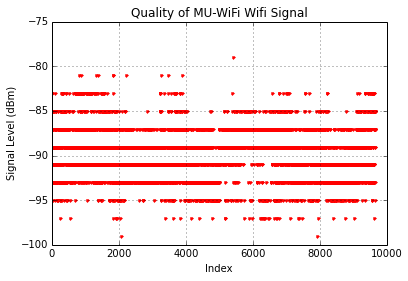

In [6]:
plt.plot(mu_wifi_wo_zero[:,1], '.r')
plt.ylabel('Signal Level (dBm)')
plt.xlabel('Index')
plt.grid()
plt.title('Quality of MU-WiFi Wifi Signal')

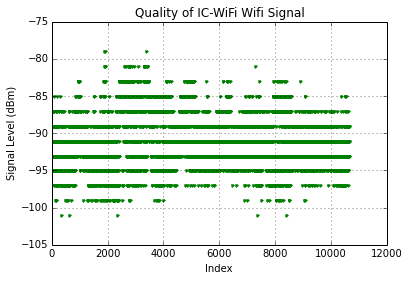

In [7]:
plt.plot(ic_wifi[:,1], '.g')
plt.ylabel('Signal Level (dBm)')
plt.xlabel('Index')
plt.grid()
plt.title('Quality of IC-WiFi Wifi Signal')

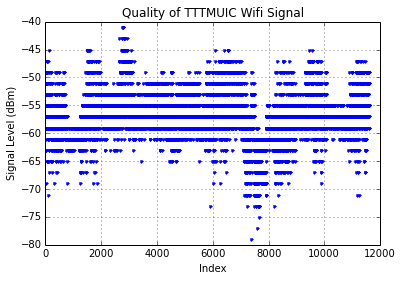

In [8]:
plt.plot(ttt_wifi[:,1], '.b')
plt.ylabel('Signal Level (dBm)')
plt.xlabel('Index')
plt.grid()
plt.title('Quality of TTTMUIC Wifi Signal')

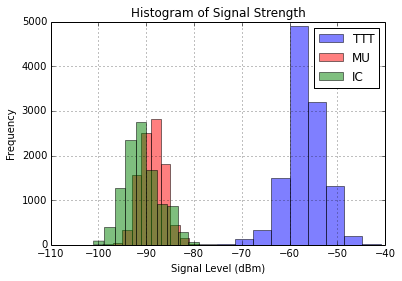

In [9]:
ttt = np.array([float(xx) for xx in ttt_wifi[:,1]])
mu = np.array([float(xx) for xx in mu_wifi_wo_zero[:,1]])
ic = np.array([float(xx) for xx in ic_wifi[:,1]])

plt.hist(ttt, color='b', alpha=0.5, label='TTT');
plt.hist(mu, color='r', alpha=0.5, label='MU');
plt.hist(ic, color='g', alpha=0.5, label='IC');
plt.title('Histogram of Signal Strength')
plt.xlabel('Signal Level (dBm)')
plt.ylabel('Frequency')
plt.grid()
plt.legend()


In [10]:
def report_data(arr):
    print "min =", np.min(arr), "dBm"
    print "mean =", np.mean(arr), "dBm"
    print "max =", np.max(arr), "dBm"
    print "std =", np.std(arr)

## Data Summary

### MU-WiFi Signal Level

In [11]:
mu = np.array([float(x) for x in mu_wifi_wo_zero[:,1]])

report_data(mu)

min = -99.0 dBm
mean = -89.761481175 dBm
max = -79.0 dBm
std = 2.59079988841


### IC-WiFi Signal Level

In [12]:
ic = np.array([float(x) for x in ic_wifi[:,1]])

report_data(ic)

min = -101.0 dBm
mean = -90.8120011269 dBm
max = -79.0 dBm
std = 3.42987962025


### TTTMUIC Signal Level

In [13]:
ttt = np.array([float(x) for x in ttt_wifi[:,1]])

report_data(ttt)

min = -79.0 dBm
mean = -56.6220784821 dBm
max = -41.0 dBm
std = 4.17945804992


In [14]:
df = pd.read_csv("data.csv")

In [15]:
df

,ssid,signal,quality,frequency,datetime
0,TTTMUIC,-55,55/70,2.412 GHz,2016-06-02T12:06:01.696438+07:00
1,Xperia Z3_412f,-57,53/70,2.412 GHz,2016-06-02T12:06:01.696438+07:00
2,TTT3MUIC,-75,35/70,2.412 GHz,2016-06-02T12:06:01.696438+07:00
3,@ AISwifi,-85,25/70,2.412 GHz,2016-06-02T12:06:01.696438+07:00
4,MU-WiFi,-85,25/70,2.412 GHz,2016-06-02T12:06:01.696438+07:00
5,JIBBY,-63,47/70,2.437 GHz,2016-06-02T12:06:01.696438+07:00
6,TTTMUIC,-57,53/70,2.412 GHz,2016-06-02T12:07:02.186787+07:00
7,Xperia Z3_412f,-63,47/70,2.412 GHz,2016-06-02T12:07:02.186787+07:00
8,TTT3MUIC,-85,25/70,2.412 GHz,2016-06-02T12:07:02.186787+07:00
9,@ AISwifi,-89,21/70,2.412 GHz,2016-06-02T12:07:02.186787+07:00
